<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

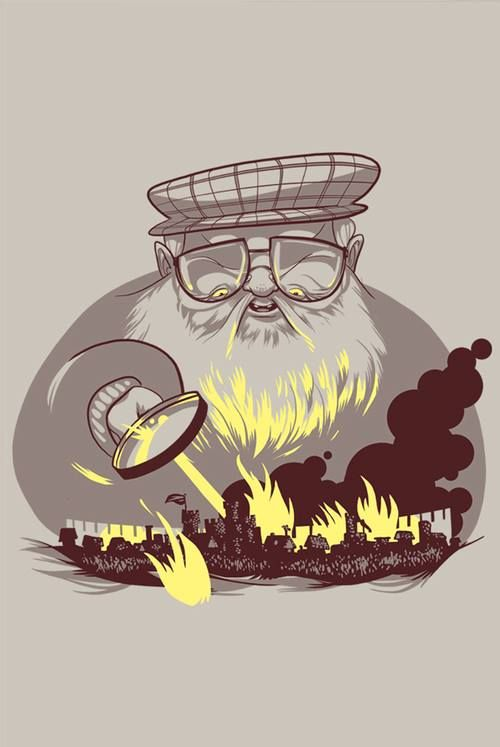

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [216]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 65.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 64.3MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [218]:
data = pd.read_csv('/content/game_of_thrones_train.csv',index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

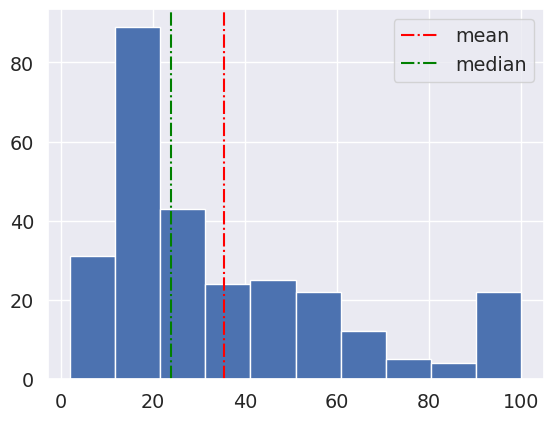

In [219]:
from pandas import DataFrame

def clear_data(data:DataFrame):
    return data.drop(columns=['mother','father','heir','spouse','isAliveFather','isAliveMother','isAliveHeir','isAliveSpouse'])

def validate_age(data:DataFrame):
    valid_age_data = data.loc[data['age']>0]
    median_age = valid_age_data['age'].dropna().median()
    data.loc[(data['age']<0)|data['age'].isna(),'age']=median_age

data_without_na = clear_data(data)
valid_age_data = data_without_na.loc[data_without_na['age']>0]
mean_age = valid_age_data['age'].dropna().mean()
median_age = valid_age_data['age'].dropna().median()

plt.hist(valid_age_data['age'])
plt.axvline(color='red',x=mean_age,label='mean',linestyle='-.')
plt.axvline(color='green',x=median_age,label='median',linestyle='-.')
plt.legend()
plt.show()

validate_age(data_without_na)

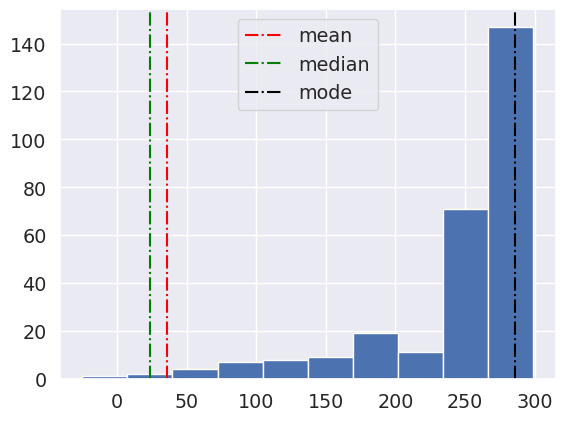

In [220]:
def validate_birth_date(data:DataFrame):
    valid_birth_data = data.loc[data['dateOfBirth']<50000]
    mode_birth = valid_birth_data['dateOfBirth'].dropna().mode()
    data.loc[(data['dateOfBirth']>50000)|data['dateOfBirth'].isna(),'dateOfBirth']=mode_birth[0]

valid_birth_data = data_without_na.loc[data_without_na['dateOfBirth']<50000]
mean_birth = valid_birth_data['dateOfBirth'].dropna().mean()
median_birth = valid_birth_data['dateOfBirth'].dropna().median()
mode_birth = valid_birth_data['dateOfBirth'].dropna().mode()

plt.hist(valid_birth_data['dateOfBirth'])
plt.axvline(color='red',x=mean_age,label='mean',linestyle='-.')
plt.axvline(color='green',x=median_age,label='median',linestyle='-.')
plt.axvline(color='black',x=mode_birth[0],label='mode',linestyle='-.')
plt.legend()
plt.show()

validate_birth_date(data_without_na)


In [221]:
def replace_not_popular_titles(data:DataFrame):
    popular_titles = data['title'].value_counts().head(3)
    data.loc[~(data['title'].isin(popular_titles.index)),'title'] = 'Rare'

replace_not_popular_titles(data_without_na)

In [222]:
def replace_not_popular_houses(data:DataFrame):
    popular_houses = data['house'].value_counts().index[1:3]
    data.loc[~(data['house'].isin(popular_houses)),'house'] = 'Rare house'

replace_not_popular_houses(data_without_na)

In [223]:
def count_median(s):
    c = s.value_counts()
    return c.index[len(c)//2]

def validate_culture(data:DataFrame):
    data.loc[(data['culture'].isna()),'culture'] = count_median(data['culture'])

validate_culture(data_without_na)
data_without_na.isna().sum()

,0
name,0
title,0
male,0
culture,0
dateOfBirth,0
house,0
book1,0
book2,0
book3,0
book4,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [224]:
def add_features(data:DataFrame):
    if 'isPopular' not in data.columns:
        data = pd.concat([data,(data['popularity']>0.5).rename('isPopular')],axis=1)
        data['isPopular'] = data['isPopular'].astype(int)
    if 'boolDeadRelations' not in data.columns:
        data = pd.concat([data,(data['numDeadRelations']>0).rename('boolDeadRelations')],axis=1)
        data['boolDeadRelations'] = data['boolDeadRelations'].astype(int)
        data.drop(['popularity','numDeadRelations'],axis=1,inplace=True)
    return data

data_without_na = add_features(data_without_na)
data_without_na

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Rare,1,Crannogmen,286.0,Rare house,0,0,0,0,0,0,0,24.0,0,1,1
2,Walder Frey,Rare,1,Rivermen,208.0,Rare house,1,1,1,1,1,1,1,97.0,1,1,1
3,Addison Hill,Ser,1,Crannogmen,286.0,Rare house,0,0,0,1,0,0,1,24.0,1,0,0
4,Aemma Arryn,Rare,0,Crannogmen,82.0,Rare house,0,0,0,0,0,1,1,23.0,0,0,0
5,Sylva Santagar,Rare,0,Dornish,276.0,Rare house,0,0,0,1,0,1,1,29.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Crannogmen,286.0,Rare house,1,0,1,1,0,0,1,24.0,1,0,0
1554,Masha Heddle,Rare,0,Crannogmen,286.0,Rare house,1,1,0,0,0,0,0,24.0,0,0,0
1555,Matthos Seaworth,Rare,1,Crannogmen,286.0,Rare house,0,1,1,1,1,0,0,24.0,0,0,0


In [225]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def change_culture(v):
    for key,value in cult.items():
        if v.lower() in value:
            return key
    return v

def handle_culture(data:DataFrame):
    data['culture'] = data['culture'].map(change_culture)

handle_culture(data_without_na)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [226]:
def drop_not_info_columns(data:DataFrame):
    data.drop(columns=['name','book1','book2','book3','book4','book5'],inplace=True)

drop_not_info_columns(data_without_na)
data = data_without_na

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

(array([ 345.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1212.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

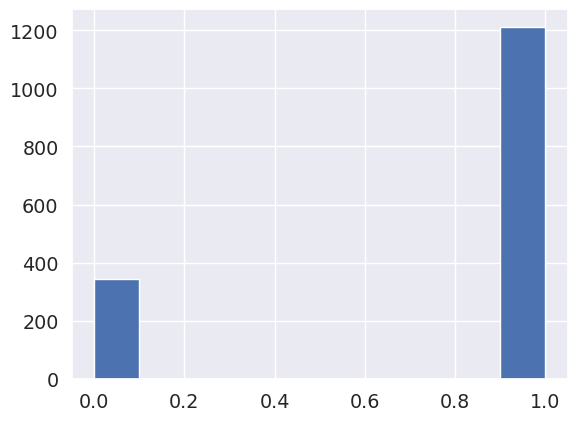

In [227]:
data['isAlive'].value_counts()
plt.hist(data['isAlive'])

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [228]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

def get_unprocessed_cat_features(data:DataFrame):
    categorial_columns = ['title','male','culture','house','isMarried','isNoble','isPopular','boolDeadRelations']
    categorial_features = data[categorial_columns]
    unprocessed_cat_features = categorial_features.select_dtypes(include='object').columns.tolist()
    return unprocessed_cat_features

def fit_encoder(data:DataFrame):
    unprocessed_cat_features = get_unprocessed_cat_features(data)
    encoder.fit(data[unprocessed_cat_features])

def encode_cat_columns(data:DataFrame):
    unprocessed_cat_features = get_unprocessed_cat_features(data)
    one_hot_df = pd.DataFrame(encoder.transform(data[unprocessed_cat_features]),columns=encoder.get_feature_names_out(unprocessed_cat_features),index=data.index)
    df_encoded = pd.concat([data,one_hot_df],axis=1)
    df_encoded.drop(unprocessed_cat_features,axis=1,inplace=True)
    return df_encoded

fit_encoder(data)
data=encode_cat_columns(data)

array([[<Axes: title={'center': 'dateOfBirth'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

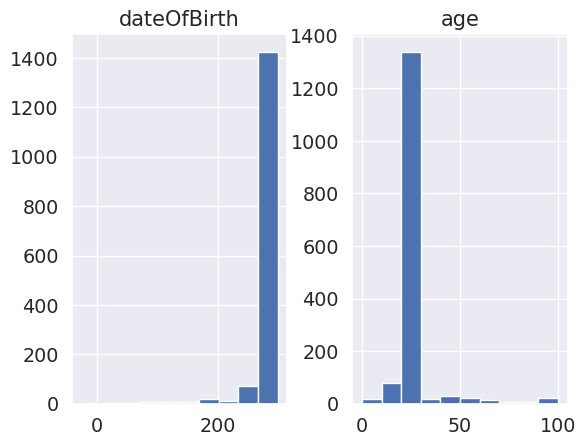

In [229]:
numerical_columns = ['dateOfBirth','age']
num_features = data[numerical_columns]
num_features.hist()

In [230]:
# sns.set()
# sns.pairplot(data)

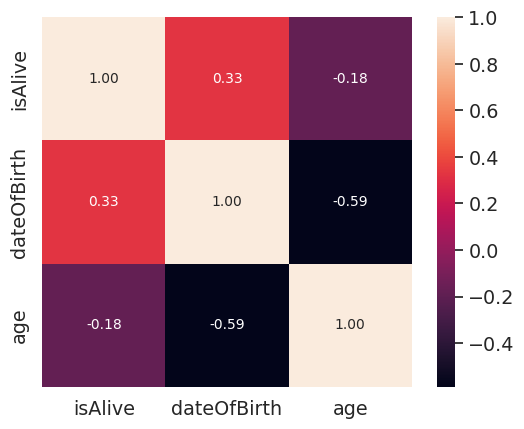

In [231]:
corrmat = data[['age','isAlive','dateOfBirth']].corr()
# correlation matrix
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data[['age','isAlive','dateOfBirth']][cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [232]:
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


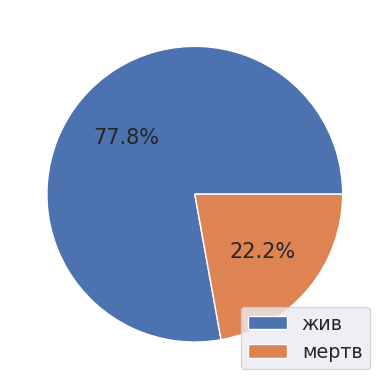

In [233]:
pie_data = data['isAlive'].value_counts()

plt.pie(pie_data,autopct='%1.1f%%')
plt.legend(['жив','мертв'])

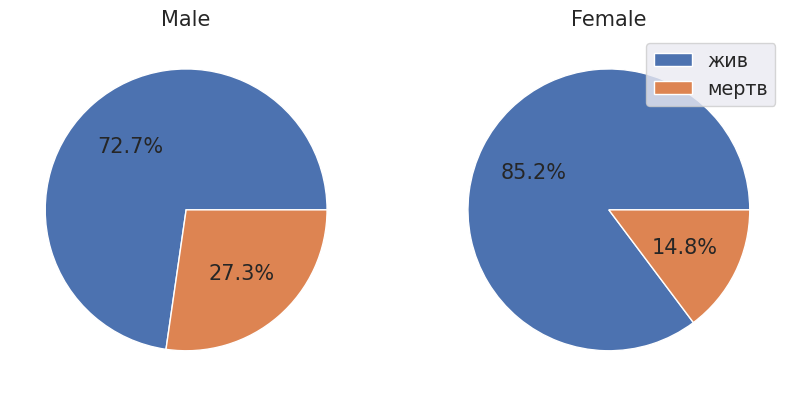

In [234]:
male_data = data.loc[(data['male'] == 1)]['isAlive'].value_counts()
female_data = data.loc[(data['male'] == 0)]['isAlive'].value_counts()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,8))

ax1.set_title('Male')
ax2.set_title('Female')

ax1.pie(male_data,autopct='%1.1f%%')
ax2.pie(female_data,autopct='%1.1f%%')
plt.legend(['жив','мертв'])

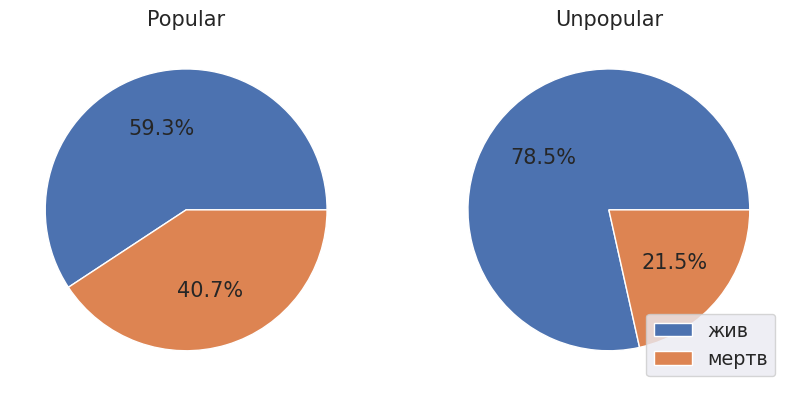

In [235]:
popular_data = data.loc[(data['isPopular'] == 1)]['isAlive'].value_counts()
unpopular_data = data.loc[(data['isPopular'] == 0)]['isAlive'].value_counts()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,8))

ax1.set_title('Popular')
ax2.set_title('Unpopular')

ax1.pie(popular_data,autopct='%1.1f%%')
ax2.pie(unpopular_data,autopct='%1.1f%%')
plt.legend(['жив','мертв'])

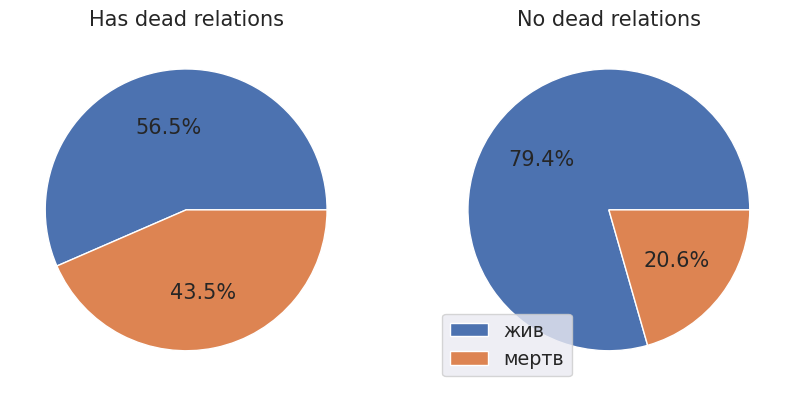

In [236]:
has_dead_rel_data = data.loc[(data['boolDeadRelations'] == 1)]['isAlive'].value_counts()
no_dead_rel_data = data.loc[(data['boolDeadRelations'] == 0)]['isAlive'].value_counts()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,8))

ax1.set_title('Has dead relations')
ax2.set_title('No dead relations')

ax1.pie(has_dead_rel_data,autopct='%1.1f%%')
ax2.pie(no_dead_rel_data,autopct='%1.1f%%')
plt.legend(['жив','мертв'])

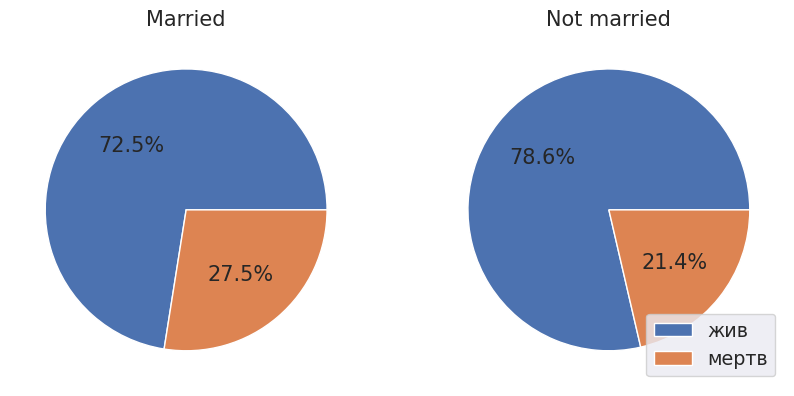

In [237]:
married_data = data.loc[(data['isMarried'] == 1)]['isAlive'].value_counts()
not_married_data = data.loc[(data['isMarried'] == 0)]['isAlive'].value_counts()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,8))

ax1.set_title('Married')
ax2.set_title('Not married')

ax1.pie(married_data,autopct='%1.1f%%')
ax2.pie(not_married_data,autopct='%1.1f%%')
plt.legend(['жив','мертв'])

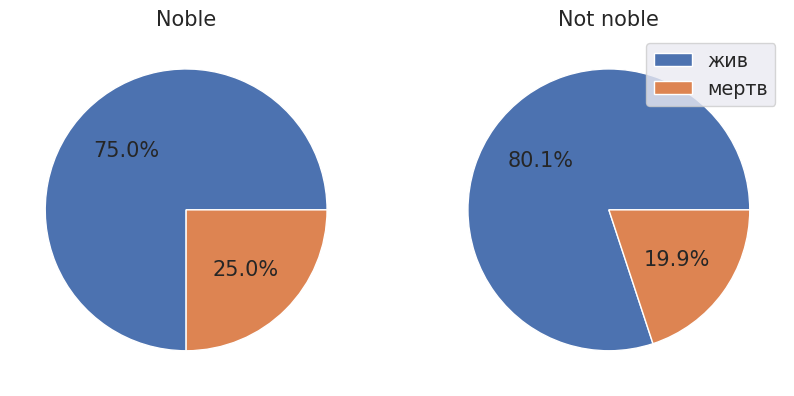

In [238]:
noble_data = data.loc[(data['isNoble'] == 1)]['isAlive'].value_counts()
not_noble_data = data.loc[(data['isNoble'] == 0)]['isAlive'].value_counts()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,8))

ax1.set_title('Noble')
ax2.set_title('Not noble')

ax1.pie(noble_data,autopct='%1.1f%%')
ax2.pie(not_noble_data,autopct='%1.1f%%')
plt.legend(['жив','мертв'])

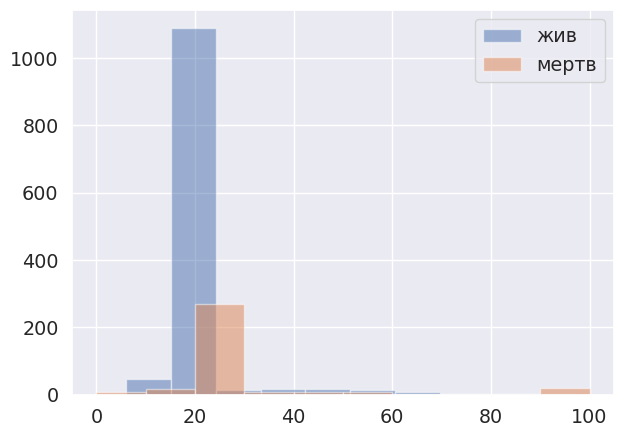

In [239]:
plt.figure(figsize=(7,5))

plt.hist(data['age'][(data['isAlive']==1)],label='жив',alpha=0.5)
plt.hist(data['age'][(data['isAlive']==0)],label='мертв',alpha=0.5)

plt.legend()
plt.show()

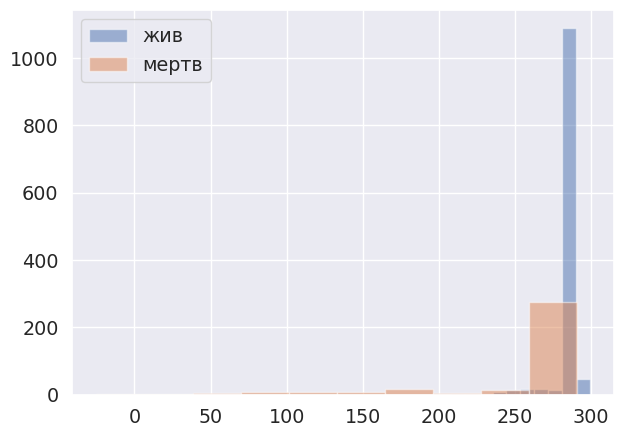

In [240]:
plt.figure(figsize=(7,5))

plt.hist(data['dateOfBirth'][(data['isAlive']==1)],label='жив',alpha=0.5)
plt.hist(data['dateOfBirth'][(data['isAlive']==0)],label='мертв',alpha=0.5)

plt.legend()
plt.show()

([<matplotlib.axis.XTick at 0x7b816fd141d0>,
 [Text(1, 0, 'Нет'), Text(2, 0, 'Да')])

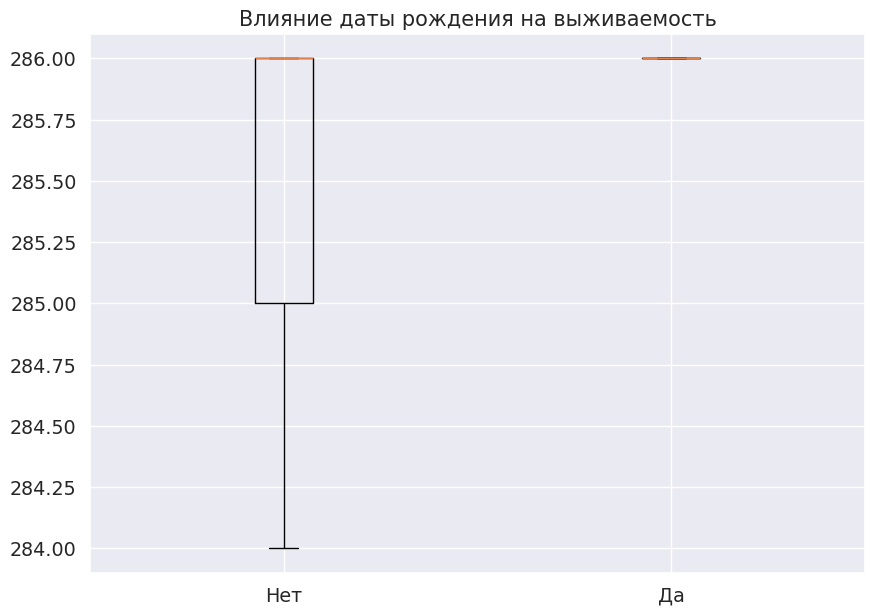

In [241]:
data1 = data['dateOfBirth'][data['isAlive']==0]
data2 = data['dateOfBirth'][data['isAlive']==1]

plt.figure(figsize=(10,7))
plt.boxplot([data1,data2],sym='')
plt.title('Влияние даты рождения на выживаемость')
plt.xticks([1, 2], ['Нет', 'Да'])

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [242]:
X = data.drop('isAlive',axis=1).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [246]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [247]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1,max_iter=3000)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [248]:
# Шаг 1. создание модели
rf = RandomForestClassifier(criterion='entropy',max_depth=7, min_samples_split=30, n_estimators=70)

# Шаг 2. обучение модели
rf.fit(X_train,y_train)

# Шаг 3. Предсказание на тестовых данных
y_rf_pred = rf.predict(X_test)

In [249]:
# Шаг 1. создание модели
knn = KNeighborsClassifier()

# Шаг 2. обучение модели
knn.fit(X_train,y_train)

# Шаг 3. Предсказание на тестовых данных
y_knn_pred = knn.predict(X_test)



In [250]:
# Шаг 1. создание модели
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20,min_samples_split=20)


# Шаг 2. обучение модели
tree.fit(X_train,y_train)

# Шаг 3. Предсказание на тестовых данных
y_tree_pred = tree.predict(X_test)


In [251]:
# Шаг 1. создание модели
abc = AdaBoostClassifier(n_estimators=200)


# Шаг 2. обучение модели
abc.fit(X_train,y_train)

# Шаг 3. Предсказание на тестовых данных
y_abc_pred = abc.predict(X_test)


In [252]:
# Шаг 1. создание модели
svc = SVC()

# Шаг 2. обучение модели
svc.fit(X_train,y_train)

# Шаг 3. Предсказание на тестовых данных
y_svc_pred = svc.predict(X_test)

In [253]:
# Шаг 1. создание модели
gpc = GaussianProcessClassifier()

# Шаг 2. обучение модели
gpc.fit(X_train,y_train)

# Шаг 3. Предсказание на тестовых данных
y_gpc_pred = gpc.predict(X_test)



In [254]:
# Шаг 1. создание модели
gnb = GaussianNB()

# Шаг 2. обучение модели
gnb.fit(X_train,y_train)

# Шаг 3. Предсказание на тестовых данных
y_gnb_pred = gnb.predict(X_test)


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [255]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [256]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8333


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [257]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_rf_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8205


In [258]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_knn_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8013


In [259]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_tree_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8269


In [260]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_abc_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8333


In [261]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_svc_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8205


In [262]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_gpc_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8462


In [263]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_gnb_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.3462


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [264]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.8MB/s]


In [265]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [266]:
test_data = pd.read_csv('/content/game_of_thrones_test.csv',index_col='S.No')
test_data=clear_data(test_data)
validate_age(test_data)
validate_birth_date(test_data)
replace_not_popular_titles(test_data)
replace_not_popular_houses(test_data)
validate_culture(test_data)
test_data=add_features(test_data)
handle_culture(test_data)
drop_not_info_columns(test_data)
test_data=encode_cat_columns(test_data)
test_X = test_data.values
test_pred_y = gpc.predict(test_X)

In [267]:
submission['isAlive']=test_pred_y

Как сохранить измененный Pandas DataFrame в csv файл:

In [268]:
submission.to_csv("/content/new_submission.csv", index=False)